In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(10)

In [2]:
churn_df = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')

# EDA 

In [3]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There're no null values <br>
We can drop RowNumber, Surname columns <br>

In [5]:
churn_df.duplicated().sum()

0

### Explore CreditScore Column <br>
Higher credit scores mean you have demonstrated responsible credit behavior in the past, which may make potential lenders & <br> creditors more confident when evaluating a request for credit <br>
under 580  are considered bad  <br>
580 to 669 are considered fair; <br>
670 and up are considered good; <br>

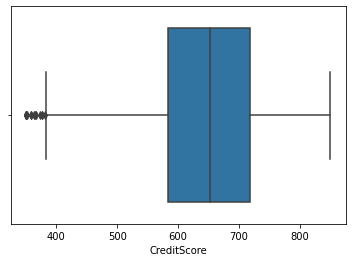

In [6]:
sns.boxplot(x="CreditScore", data=churn_df);

In [7]:
scoreless580 = churn_df["CreditScore"] < 580
scoreless669 = (churn_df["CreditScore"] >= 580) & (churn_df["CreditScore"] <= 669)
scoremore670 = churn_df["CreditScore"] >= 670

churn_df["score_cat"] = 0
churn_df.loc[scoreless669, "score_cat"] = 1
churn_df.loc[scoremore670, "score_cat"] = 2

In [8]:
churn_df.loc[scoreless669, "score_cat"] = 1
churn_df.loc[scoremore670, "score_cat"] = 2

In [9]:
churn_df["score_cat"].value_counts()

2    4307
1    3331
0    2362
Name: score_cat, dtype: int64

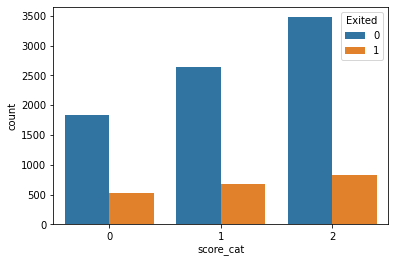

In [10]:
sns.countplot(x="score_cat", hue="Exited", data=churn_df);

Higher score more clint stay with bank 

### Explore Geography Column <br>


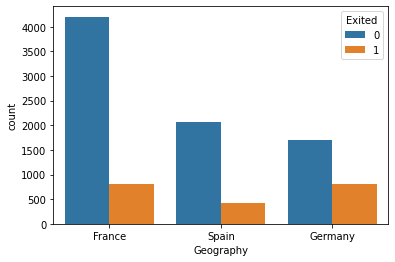

In [11]:
sns.countplot(x="Geography", hue="Exited", data=churn_df);

It seems that people in France are more like to stay in the bank than others <br>
check if this true 


In [12]:
churn_df[["Geography", "Exited"]].value_counts(normalize=True)

Geography  Exited
France     0         0.4204
Spain      0         0.2064
Germany    0         0.1695
           1         0.0814
France     1         0.0810
Spain      1         0.0413
dtype: float64

The assumption seems true, but might it because "Excited" data is not balanced <br>
Check if Exited data is balanced 

In [13]:
churn_df["Geography"].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [14]:
churn_df["Exited"].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

1- Most of data were collected from France banks so it's not balanced <br>
2- "Excited" data is not balanced too

### Explore Gender Column <br>


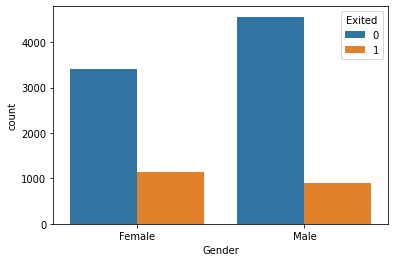

In [15]:
sns.countplot(x="Gender", hue="Exited", data=churn_df);

In [16]:
churn_df["Gender"].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [17]:
churn_df[["Gender", "Exited"]].value_counts(normalize=True)

Gender  Exited
Male    0         0.4559
Female  0         0.3404
        1         0.1139
Male    1         0.0898
dtype: float64

Males are more likely to stay @ the bank than Females

### Explore Age Column <br>


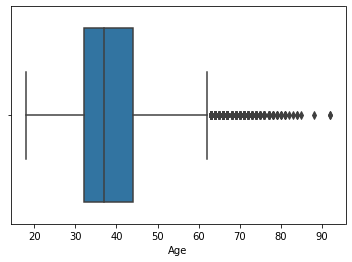

In [18]:
sns.boxplot(x="Age", data=churn_df);

In [19]:
churn_df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Split Age column To find if there's a relationship between Exited and age 

In [20]:
churn_df["cat_age"] = pd.qcut(churn_df["Age"], q=3, labels=False )

In [21]:
print("-----Age Intervals-----")
churn_df.groupby("cat_age")["Age"].agg(['min','max','count'])

-----Age Intervals-----


,min,max,count
cat_age,,,
0,18,34,3679
1,35,41,3106
2,42,92,3215


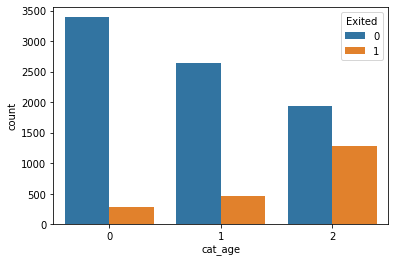

In [22]:
sns.countplot(x="cat_age", hue="Exited", data=churn_df);

People who are age > 41 are more likely to leave the bank and vice versa! 

### Explore Tenure Column <br>


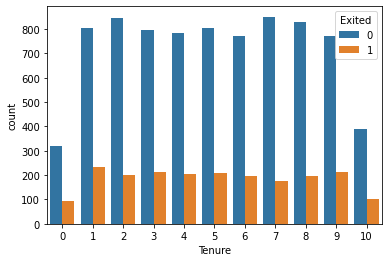

In [23]:
sns.countplot(x="Tenure", hue="Exited", data=churn_df);

There's no obvious trend or relationship between Tenure and Excited, so we can discard this column from training

### Explore Balance Column <br>


In [24]:
churn_df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

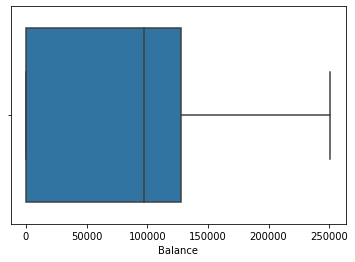

In [25]:
sns.boxplot(x="Balance", data=churn_df);

split "Balance" column to 4 category <br>
0 -->     Balance == 0 <br>
1 --> 0 < Balance <= 100,000 <br>
2 --> 100,000 < Balance <= 150,000 <br>
3 --> 150,000 < Balance  <br>

In [26]:
churn_df["cat_balance"] = 0

In [27]:
churn_df.loc[((churn_df.Balance > 0) & (churn_df.Balance <= 100000)),"cat_balance"] = 1
churn_df.loc[((churn_df.Balance > 100000) & (churn_df.Balance <= 150000)),"cat_balance"] = 2
churn_df.loc[(churn_df.Balance > 150000),"cat_balance"] = 3

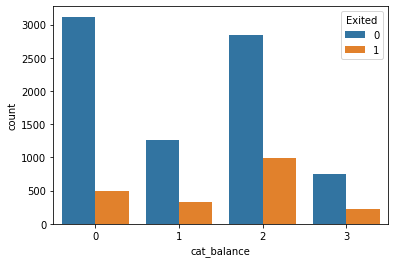

In [28]:
sns.countplot(x="cat_balance", hue="Exited", data=churn_df);

### Explore NumOfProducts Column <br>


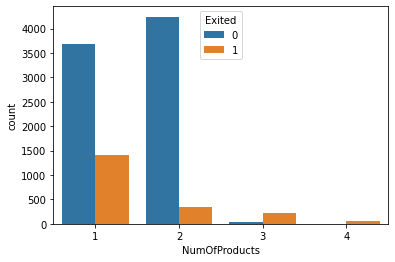

In [29]:
sns.countplot(x="NumOfProducts", hue="Exited", data=churn_df);

In [30]:
churn_df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

NumOfProducts column has unbalanced categories for categories 3, and 4  <br>
But from categories 1 and 2, it seems that clients who have more products with the bank aim to stay with the bank <br>

Create a new column have_products that have 1 for clients with more than one product and 0 who is not  

In [31]:
churn_df["have_products"] = 0
churn_df.loc[churn_df["NumOfProducts"]>1, "have_products"] = 1

In [32]:
churn_df["have_products"].value_counts(normalize=True)

0    0.5084
1    0.4916
Name: have_products, dtype: float64

In [33]:
churn_df[["have_products", "Exited"]].value_counts(normalize=True)

have_products  Exited
1              0         0.4288
0              0         0.3675
               1         0.1409
1              1         0.0628
dtype: float64

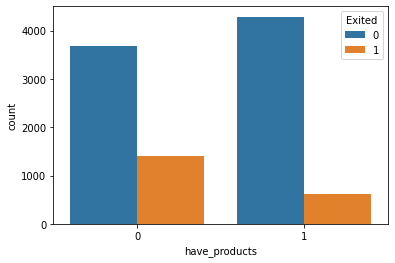

In [34]:
sns.countplot(x="have_products", hue="Exited", data=churn_df);

Conclusion clients with more products with the bank seem to stay more with the bank 

### Explore HasCrCard Column <br>


In [35]:
churn_df[["HasCrCard", "Exited"]].value_counts(normalize=True)

HasCrCard  Exited
1          0         0.5631
0          0         0.2332
1          1         0.1424
0          1         0.0613
dtype: float64

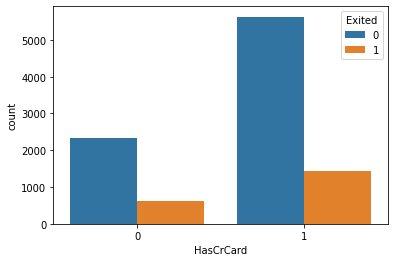

In [36]:
sns.countplot(x="HasCrCard", hue="Exited", data=churn_df);

Conclusion clients with credit-card seem to stay more with the bank 

### Explore IsActiveMember Column <br>


In [37]:
churn_df[["IsActiveMember", "Exited"]].value_counts(normalize=True)

IsActiveMember  Exited
1               0         0.4416
0               0         0.3547
                1         0.1302
1               1         0.0735
dtype: float64

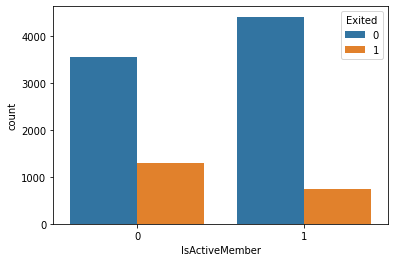

In [38]:
sns.countplot(x="IsActiveMember", hue="Exited", data=churn_df);

Conclusion Active clients  seem to stay more with the bank 

### Explore EstimatedSalary Column <br>


In [39]:
churn_df["EstimatedSalary"].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

Split EstimatedSalary column to 3 categories  <br>


In [40]:
churn_df["salary_cat"] = pd.qcut(churn_df["EstimatedSalary"], q=3, labels=False )

In [41]:
churn_df[["salary_cat", "Exited"]].value_counts(normalize=True)

salary_cat  Exited
1           0         0.2674
0           0         0.2663
2           0         0.2626
            1         0.0707
0           1         0.0671
1           1         0.0659
dtype: float64

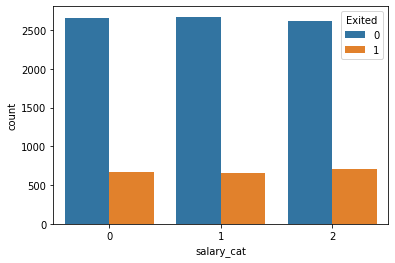

In [42]:
sns.countplot(x="salary_cat", hue="Exited", data=churn_df);

There's no obvious trend or relationship between salary_cat and Excited, so we can discard this column from training

## Prepare data for training

### Split data to train, validate, test

In [43]:
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_cat', 'cat_age',
       'cat_balance', 'have_products', 'salary_cat'],
      dtype='object')

In [44]:
features1 = ["Geography", "Gender", "cat_balance", "have_products", "HasCrCard", "IsActiveMember", "score_cat", "cat_age"]
features2 = ["Geography", "Gender", "cat_balance", "have_products", "HasCrCard", "IsActiveMember", "score_cat", "salary_cat"]
features3 = ["Geography", "Gender", "cat_balance", "have_products", "HasCrCard", "IsActiveMember", "score_cat", "EstimatedSalary"]
features4 = ["Geography", "Gender", "cat_balance", "have_products", "HasCrCard", "IsActiveMember", "score_cat", "cat_age", "salary_cat"]
features5 = ["Geography", "Gender", "Balance", "have_products", "HasCrCard", "IsActiveMember", "score_cat", "cat_age"]
features6 = ["Geography", "Gender", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "score_cat", "cat_age"]
features7 = ["Geography", "Gender", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "Tenure", "cat_age", "EstimatedSalary"]
features8 = ["Geography", "Gender", "cat_balance", "Balance", "have_products", "NumOfProducts", "HasCrCard", "IsActiveMember", "cat_age", "EstimatedSalary"]

In [45]:
X = churn_df.drop(["Exited"], axis=1)
y = churn_df["Exited"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
X_train = X_train[features6]
X_test = X_test[features6]

In [48]:
# Geography, Gender --> labeled_Encoding 
cat_features = ["Geography", "Gender"]
le = LabelEncoder()
for i in cat_features:
    le.fit(X_train[i])
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

In [49]:
# One hot encoder for "Geography", "Gender"
def onehotencoder(df, columns):
    for col in columns:
        cats = df[col].unique()
        for i in range(len(cats)):
            name = col +"_"+ cats[i]
            df[name] = df[col].map({cats[i]: 1})
            df[name].fillna(0, inplace=True)
    return df

In [50]:
"""cat_features = ["Geography", "Gender"]
X_train = onehotencoder(X_train, cat_features)
X_test = onehotencoder(X_test, cat_features)

X_train.drop(["Geography", "Gender"], axis=1, inplace=True)
X_test.drop(["Geography", "Gender"], axis=1, inplace=True)
"""

'cat_features = ["Geography", "Gender"]\nX_train = onehotencoder(X_train, cat_features)\nX_test = onehotencoder(X_test, cat_features)\n\nX_train.drop(["Geography", "Gender"], axis=1, inplace=True)\nX_test.drop(["Geography", "Gender"], axis=1, inplace=True)\n'

In [51]:
display(X_train.head(2))
display(X_test.head(2))


,Geography,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,score_cat,cat_age
2694,1,1,113146.98,2,0,1,1,0
5140,0,0,105767.28,2,0,0,1,0


,Geography,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,score_cat,cat_age
9953,0,1,0.00,2,1,1,0,2
3850,0,1,143292.95,1,1,0,2,0


In [52]:
# Standarize data
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## ANN Model

In [53]:
model = keras.models.Sequential()
#model.add(layers.Flatten(input_shape=X_train.shape, name='input'))
#model.add(layers.Dense(100, activation='relu', name='hidden_1'))
#model.add(layers.Dense(50, activation='relu', name='hidden_2'))
#model.add(layers.Dense(10, activation='sigmoid', name='output'))

model.add(layers.Dense(units = 300, activation='relu',input_shape=X_train.shape))
model.add(layers.Dense(units = 200, activation='relu'))
model.add(layers.Dense(units = 150, activation='relu'))
model.add(layers.Dense(units = 10, activation = 'sigmoid'))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [54]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8000, 300)         2700      
_________________________________________________________________
dense_1 (Dense)              (None, 8000, 200)         60200     
_________________________________________________________________
dense_2 (Dense)              (None, 8000, 150)         30150     
_________________________________________________________________
dense_3 (Dense)              (None, 8000, 10)          1510      
Total params: 94,560
Trainable params: 94,560
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 100, epochs = 100)

2021-10-23 00:29:43.043943: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
54/54 [==============================] - 1s 9ms/step - loss: 0.7382 - accuracy: 0.7835 - val_loss: 0.4223 - val_accuracy: 0.8175
Epoch 2/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.8253 - val_loss: 0.4236 - val_accuracy: 0.8092
Epoch 3/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4007 - accuracy: 0.8343 - val_loss: 0.3877 - val_accuracy: 0.8345
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3814 - accuracy: 0.8421 - val_loss: 0.3752 - val_accuracy: 0.8376
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.8492 - val_loss: 0.3672 - val_accuracy: 0.8395
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3600 - accuracy: 0.8513 - val_loss: 0.3735 - val_accuracy: 0.8326
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3587 - accuracy: 0.8515 - val_loss: 0.3592 - val_accuracy: 0.8466
Epoch 8/100
5

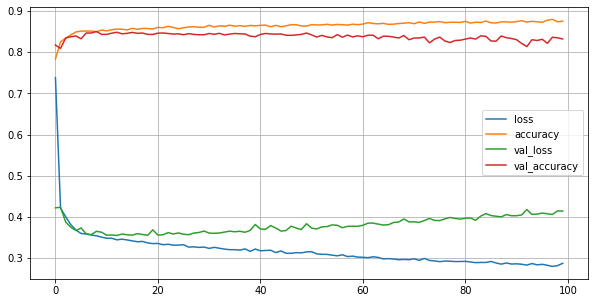

In [57]:
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [58]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8435


[0.4124644100666046, 0.843500018119812]